In [ ]:
# PROCESS THE COMOVING STARS CATAOLOG:
# https://zenodo.org/records/4435257
# https://academic.oup.com/mnras/article/506/2/2269/6131876#
#
# ZACK REEVES
# CREATED: 2024
#
# VERSIONS:
#  1.1  JAN 2024 CREATE JUPYTER NOTEBOOK

In [2]:
# **STEPS TO RUN THIS CODE**

# There are two ways you can generate this catalog:

# The first (more straightforward) is to go to the above zenodo link to download the catalog
# Download 'all_columns_catalog.fits.gz' - the csv.gz seems to be corrupt

# The second way can be useful for updates with future data releases, but there are some kinks
# Run el_badry_query.py, then run num_neighbors_edr3.py, then run find_binaries_edr3.py, which should generate the catalog

# Once the catalog is obtained, run the rest of the processing code.  There should be ~1.8 million binary systems or >3 million stars, so it can be slow

# If any errors occur, consider slicing the data down to the first 1000 rows (data[:1000]) to debug
# Can also add "select TOP 1000" to the query to grab 1000 stars for testing

In [3]:
import pandas as pd
import numpy as np
import sys
import collections

from matplotlib import pyplot as plt, colors

from astroquery.gaia import Gaia
from astroquery.utils.tap.core import TapPlus

from astropy.io import fits
import astropy.table as table
from astropy.table import Table, vstack

sys.path.insert(0, '..')
from common import file_functions, calculations, gaia_functions

In [4]:
# Define the metadata for the data set. 
metadata = {}

metadata['project'] = 'Digital Universe Atlas'
metadata['sub_project'] = 'Comoving Stars'

metadata['catalog'] = 'A million binaries from Gaia eDR3: sample selection and validation of Gaia parallax uncertainties (El-Badry+, 2021)'
metadata['catalog_author'] = 'El-Badry+'
metadata['catalog_year'] = '2021'
metadata['catalog_doi'] = 'https://doi.org/10.1093/mnras/stab323'
metadata['catalog_bibcode'] = '2021MNRAS.506.2269E'


metadata['prepared_by'] = 'Zack Reeves (AMNH)'
metadata['version'] = '1.1'

metadata['dir'] = metadata['sub_project'].replace(' ', '_').lower()
metadata['raw_data_dir'] = ''

metadata['data_group_title'] = 'ComovingStars'
metadata['data_group_desc'] = 'Comoving Star catalog'
metadata['data_group_desc_long'] = 'Comoving Star catalog'
metadata['fileroot'] = 'comov'

file_functions.generate_license_file(metadata)
#file_functions.generate_asset_file(metadata, data_display_type="GaiaRenderable")
file_functions.generate_asset_file(metadata)

In [5]:
# The following 4 cells are method 2 for generating the catalog - uncomment if you want to do it that way

In [6]:
# #running code with -i allows us to run the .py files in the same namespace as our .ipynb
%run -i el_badry_query.py

../common/gaia_credentials.txt
INFO: Login to gaia TAP server [astroquery.gaia.core]
OK
INFO: Login to gaia data server [astroquery.gaia.core]
OK
inputting job query, this can take a very long time. go get a coffee or something


KeyboardInterrupt: 

In [ ]:
data = Table.read('raw_data/1719240801275O-result.vot.gz') #edit with query results file name
data.write('raw_data/edr3_parallax_snr5_goodG.csv')

In [ ]:
# #running code with -i allows us to run the .py files in the same namespace as our .ipynb
%run -i num_neighbors_edr3.py

In [ ]:
%run -i find_binaries_edr3.py

In [ ]:
# Method 1 - download 'all_columns_catalog.fits.gz' from https://zenodo.org/records/4435257
# Make sure you grab the FITS.gz!!

#Uncomment these lines if you want to see all of the columns in the table
#binaries_table = Table.read('raw_data/all_columns_catalog.fits.gz')
#binaries = binaries_table[['source_id1', 'source_id2', 'ra1', 'ra2', 'dec1', 'dec2', 'parallax1', 'parallax2', 'parallax_error1', 'parallax_error2', 'pmra1', 'pmra2', 'pmdec1', 'pmdec2', 'dr2_radial_velocity1', 'dr2_radial_velocity2', 'phot_g_mean_mag1', 'phot_g_mean_mag2', 'bp_rp1', 'bp_rp2']]

#pares the table down to just the columns we want
binaries = Table.read('all_columns_catalog.fits.gz')[['source_id1', 'source_id2', 'ra1', 'ra2', 'dec1', 'dec2', 'parallax1', 'parallax2', 'parallax_error1', 'parallax_error2', 'pmra1', 'pmra2', 'pmdec1', 'pmdec2', 'dr2_radial_velocity1', 'dr2_radial_velocity2', 'phot_g_mean_mag1', 'phot_g_mean_mag2', 'bp_rp1', 'bp_rp2']]

In [ ]:
binaries

source_id1,source_id2,ra1,ra2,dec1,dec2,parallax1,parallax2,parallax_error1,parallax_error2,pmra1,pmra2,pmdec1,pmdec2,dr2_radial_velocity1,dr2_radial_velocity2,phot_g_mean_mag1,phot_g_mean_mag2,bp_rp1,bp_rp2
,,deg,deg,deg,deg,mas,mas,mas,mas,mas / yr,mas / yr,mas / yr,mas / yr,km / s,km / s,mag,mag,mag,mag
int64,int64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32
4282339100022417152,4282339095720590720,282.80943113005753,282.8088579357593,5.692464376105104,5.688739805905678,2.466308813127245,3.129725645547363,0.015508463,0.28737023,-18.500443947672455,-18.279317121880627,-14.406112556212221,-15.135270582024575,1e+20,1e+20,13.611431,19.332829,1.2012444,2.8635502
4089436931798712576,4089437344115586432,276.31365516286564,276.32563147342296,-23.55099339732246,-23.53250430327995,2.4230962227012838,2.92015611211368,0.089352295,0.23494595,-4.344694168896968,-3.844595829572494,-15.805990832000269,-15.86176044805748,1e+20,1e+20,16.55553,17.554398,2.0625582,2.3000774
4282722760856124416,4282722790916299648,283.2152167318123,283.19616572286793,5.949548004855735,5.946408290921299,1.043858388313062,1.129170131567232,0.074837394,0.20538272,-2.044045573754162,-2.223293512377718,-5.464987837879764,-5.082799378502095,1e+20,1e+20,17.21575,18.838839,2.2041664,2.6551952
4128188325747199104,4128188325747198080,256.87034730707893,256.8701664814668,-20.23579945116703,-20.23719657986973,1.6715541895959316,1.6474244682595314,0.016625766,0.026787495,-0.5260189837622264,-0.6637311157992818,-1.4130767700283122,-1.2128449819335219,1e+20,1e+20,10.708571,14.772901,0.46109104,1.348856
4281789722159307520,4281789717861282176,285.41625509993867,285.4185112346541,5.741901784051386,5.736569021788802,6.792464103222925,6.910620412548305,0.03448111,0.59699315,58.48323610167057,58.73585293491805,54.8894404302667,55.45664965375919,1e+20,1e+20,15.277895,20.10868,2.278595,1.4007969
4282724650641727872,4282724650639708544,283.2227851522741,283.2227363767862,5.9887962807392086,5.989005471747089,2.1027175948727366,2.2964277276341614,0.14107291,0.14666869,4.516002516901692,4.712677029185624,-13.312194163857983,-13.221949600208935,1e+20,1e+20,17.787447,17.822773,2.360032,2.5178146
4282965924725362688,4282959052795542528,278.80555562237925,278.81945957663225,2.9128830075322405,2.7355773536622063,3.3046529540865652,3.580517159423659,0.08917539,0.4359517,9.004014536214736,9.639046118315115,-17.96889032894573,-18.072548689183368,1e+20,1e+20,17.351631,19.666504,2.4601746,2.5670204
4282725887591623296,4282725990671536768,283.1393441633273,283.1410394877496,5.951141380791695,5.964439918055445,2.628816284167264,2.677983488266381,0.015332188,0.25609326,-27.4183553467694,-27.14603777565812,-28.898634728712942,-28.71966753973456,1e+20,1e+20,13.960834,19.086115,1.3664894,3.2391872


In [ ]:
#creating a table for the primary stars in the system
data_1 = binaries[['source_id1', 'ra1', 'dec1', 'parallax1', 'parallax_error1', 'pmra1', 'pmdec1', 'dr2_radial_velocity1', 'phot_g_mean_mag1', 'bp_rp1']]

In [ ]:
#creating a table for the secondary stars in the system
data_2 = binaries[['source_id2', 'ra2', 'dec2', 'parallax2', 'parallax_error2', 'pmra2', 'pmdec2', 'dr2_radial_velocity2', 'phot_g_mean_mag2', 'bp_rp2']]

In [ ]:
#renaming columns to remove the 1s and 2s to facilitate table stacking
data_1.rename_columns(['source_id1', 'ra1', 'dec1', 'parallax1', 'parallax_error1', 'pmra1', 'pmdec1', 'dr2_radial_velocity1', 'phot_g_mean_mag1', 'bp_rp1'], ['source_id', 'ra', 'dec', 'parallax', 'parallax_error', 'pmra', 'pmdec', 'dr2_radial_velocity', 'phot_g_mean_mag', 'bp_rp']),
data_2.rename_columns(['source_id2', 'ra2', 'dec2', 'parallax2', 'parallax_error2', 'pmra2', 'pmdec2', 'dr2_radial_velocity2', 'phot_g_mean_mag2', 'bp_rp2'], ['source_id', 'ra', 'dec', 'parallax', 'parallax_error', 'pmra', 'pmdec', 'dr2_radial_velocity', 'phot_g_mean_mag', 'bp_rp'])

In [ ]:
#adding a column to indicate which stars are primary or secondary
data_1['binary_index']=[str(i)+'_1' for i in range(len(binaries))]
data_2['binary_index']=[str(i)+'_2' for i in range(len(binaries))]

In [ ]:
#stacking the tables together for one whole dataset
data = vstack([data_1, data_2])

In [ ]:
data

source_id,ra,dec,parallax,parallax_error,pmra,pmdec,dr2_radial_velocity,phot_g_mean_mag,bp_rp,binary_index
,deg,deg,mas,mas,mas / yr,mas / yr,km / s,mag,mag,
int64,float64,float64,float64,float32,float64,float64,float32,float32,float32,str9
4282339100022417152,282.80943113005753,5.692464376105104,2.466308813127245,0.015508463,-18.500443947672455,-14.406112556212221,1e+20,13.611431,1.2012444,0_1
4089436931798712576,276.31365516286564,-23.55099339732246,2.4230962227012838,0.089352295,-4.344694168896968,-15.805990832000269,1e+20,16.55553,2.0625582,1_1
4282722760856124416,283.2152167318123,5.949548004855735,1.043858388313062,0.074837394,-2.044045573754162,-5.464987837879764,1e+20,17.21575,2.2041664,2_1
4128188325747199104,256.87034730707893,-20.23579945116703,1.6715541895959316,0.016625766,-0.5260189837622264,-1.4130767700283122,1e+20,10.708571,0.46109104,3_1
4281789722159307520,285.41625509993867,5.741901784051386,6.792464103222925,0.03448111,58.48323610167057,54.8894404302667,1e+20,15.277895,2.278595,4_1
4282724650641727872,283.2227851522741,5.9887962807392086,2.1027175948727366,0.14107291,4.516002516901692,-13.312194163857983,1e+20,17.787447,2.360032,5_1
4282965924725362688,278.80555562237925,2.9128830075322405,3.3046529540865652,0.08917539,9.004014536214736,-17.96889032894573,1e+20,17.351631,2.4601746,6_1
4282725887591623296,283.1393441633273,5.951141380791695,2.628816284167264,0.015332188,-27.4183553467694,-28.898634728712942,1e+20,13.960834,1.3664894,7_1


In [ ]:
#calculating distance in light years and parsecs
#this dataset only uses gaia parallaxes to calculate distance to avoid the cpmutational expense of uploading >3 million stars to grab BJ distances
calculations.get_distance(data, parallax='parallax', use='parallax')

#setting metadata for dcalc
data['dcalc'] = data.Column([3]*len(data),
                            meta=collections.OrderedDict([('ucd', 'meta.dcalc')]),
                            description='Distance Indicator: 1 indicates a Bailer-Jones photogeometric distance; 2 indicates a Bailer-Jones geometric distance; 3 indicates a Gaia parallax-based distance')

In [ ]:
#calculating cartesian coordinates
calculations.get_cartesian(data, ra='ra', dec='dec', pmra='pmra', pmde='pmdec', radial_velocity='dr2_radial_velocity', frame='icrs')

KeyboardInterrupt: 

<function matplotlib.pyplot.show(close=None, block=None)>

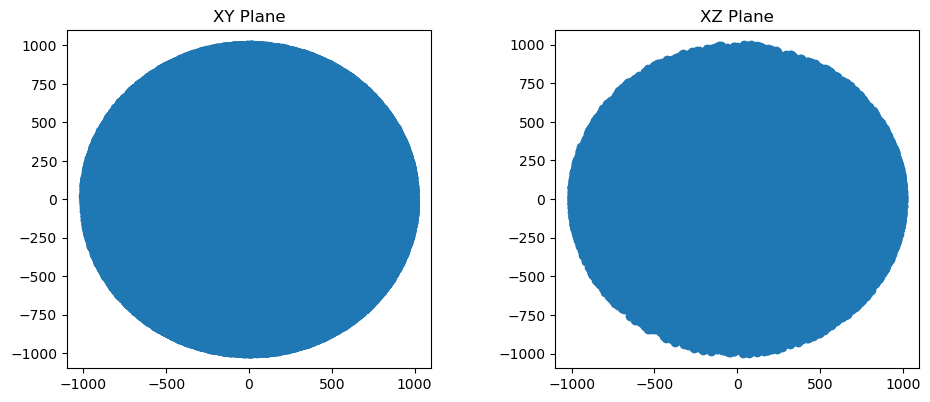

In [ ]:
#2D Visualization
fig, ax = plt.subplots(1, 2)

#XY Plane
ax[0].scatter(data['x'], data['y'])
ax[0].set_title('XY Plane')

#XZ Plane
ax[1].scatter(data['x'], data['z'])
ax[1].set_title('XZ Plane')

#set good spacing
fig.tight_layout()
fig.set_size_inches(10, 4, forward=True)
plt.show

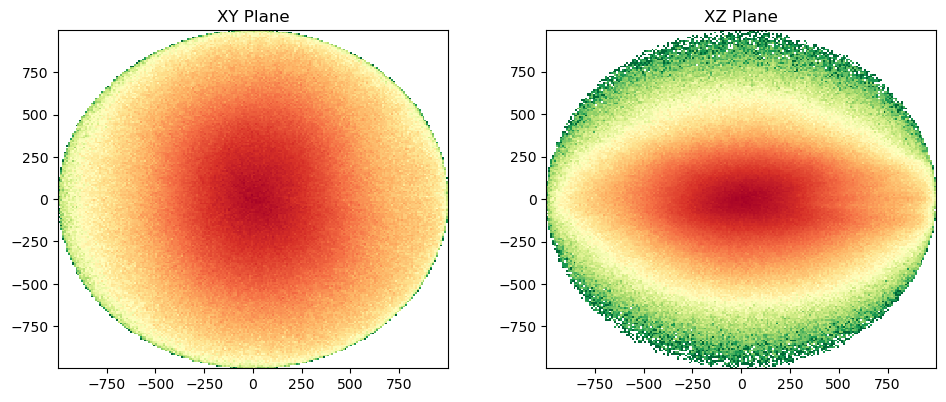

In [ ]:
#2D Density Visualization
fig, ax = plt.subplots(1, 2)

#XY Plane
ax[0].hist2d(data['x'], data['y'], 
           bins = 200,  
           norm = colors.LogNorm(),  
           cmap = "RdYlGn_r",) 
ax[0].set_title('XY Plane')

#XZ Plane
ax[1].hist2d(data['x'], data['z'], 
           bins = 200,  
           norm = colors.LogNorm(),  
           cmap = "RdYlGn_r",) 
ax[1].set_title('XZ Plane')

#set good spacing
fig.tight_layout()
fig.set_size_inches(10, 4, forward=True)
#plt.show

In [ ]:
# data quality test
data['error_over_parallax']=[data['parallax_error'][i]/data['parallax'][i] for i in range(len(data))]
len(data[data['error_over_parallax']>0.15])

463821

In [ ]:
gaia_functions.get_magnitudes(data)
gaia_functions.get_luminosity(data)
gaia_functions.get_bp_g_color(data, color='bp_rp')

KeyboardInterrupt: 

In [ ]:
#construct a speck comment column
data['speck_label'] = data.Column(data=['#__'+str(name) for name in data['source_id']], 
                                  meta=collections.OrderedDict([('ucd', 'meta.id')]),
                                  description='Gaia EDR3 Source ID')

#construct a label column
data['label'] = ['GaiaEDR3_'+ str(source) for source in data['source_id']]  #leaving for now in case we want to add other labels

In [ ]:
#setting texture number column
data['texnum'] = data.Column(data=[1]*len(data), 
                                  meta=collections.OrderedDict([('ucd', 'meta.texnum')]),
                                  description='Texture Number')

In [ ]:
#Getting the column metadata
columns = file_functions.get_metadata(data, columns=['x', 'y', 'z', 'color', 'lum', 'absmag', 'appmag', 'texnum', 'dist_ly', 'dcalc', 'u', 'v', 'w', 'speed', 'speck_label'])
columns

,name,unit,datatype,width,precision,arraysize,ucd,description
0,x,pc,float64,,6,,pos.cartesian.x,x position (galactic cartesian coordinates) in...
1,y,pc,float64,,6,,pos.cartesian.y,Position (y coordinate) in parsecs
2,z,pc,float64,,6,,pos.cartesian.z,Position (z coordinate) in parsecs
3,color,solLum,float32,,2,,phys.color,Gaia BP-G color
4,lum,solLum,float64,,6,,phys.luminosity,Stellar Luminosity
5,absmag,mag,float64,,6,,phot.magAbs;em.opt.G,Absolute magnitude in Gaia G-band
6,appmag,mag,float32,,6,,phot.mag;em.opt.G,Apparent magnitude in Gaia G-band
7,texnum,,int64,,,,meta.texnum,Texture Number
8,dist_ly,lyr,float64,,1,,pos.distance,Distance from Sun (lyr)
9,dcalc,,int64,,,,meta.dcalc,Distance Indicator: 1 indicates a Bailer-Jones...


In [ ]:
# Print the speck file using the to_speck function in file_functions
file_functions.to_speck(metadata, Table.to_pandas(data), columns)

/home/abbott/Projects/Gaia_Subsets/os_gaia_module/src/comoving/../common/file_functions.py:144: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_speck.loc[0:len(df_speck),'speck_label'].replace(' ', '__', regex=True, inplace=True)


In [ ]:
# Print the label file using the to_label function in file_functions
file_functions.to_label(metadata, Table.to_pandas(data))

In [ ]:
# Print the csv file using the to_csv function in file_functions
file_functions.to_csv(metadata, Table.to_pandas(data), columns)